In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega les dades

Importa les dades emmagatzemades a l'arxiu "enfriadora.csv" com a dataframe (dades)

In [8]:
df = pd.read_csv('enfriadora.csv', parse_dates=['fecha'])
df.head()

,fecha,TT811_Analogico_PLC,TT812_Analogico_PLC,FE811_Analogico_PLC,Energia_iEM3155_EF701_PotAct,TT711_Analogico_PLC,TT712_Analogico_PLC,FE711_Analogico_PLC
0,2021-03-14 08:26:15,28.0201,30.9823,314.272,140.160,14.5797,9.68967,159.563
1,2021-03-14 08:31:17,28.0201,31.0836,314.091,147.693,14.8872,9.68967,160.113
2,2021-03-14 08:36:19,28.0201,31.1849,314.797,155.344,15.1005,9.79094,165.726
3,2021-03-14 08:41:20,28.1250,32.1108,315.014,183.160,15.3284,9.89583,199.609
4,2021-03-14 08:46:24,28.4433,33.6118,315.918,247.408,15.5346,9.88137,244.922


### Descripció de les columnes del dataset

- ``fecha`` :  Data i hora del registre de dades.

- ``TT811_Analogico_PLC``: temperatura ``TT811`` llegit a l'entrada del circuit "calent" (ºC).

- ``TT812_Analogico_PLC``: temperatura ``TT812`` llegit a sortida del circuit "calent" (ºC).

- ``FE811_Analogico_PLC``: mesura de cabal/flux ``FE811`` llegit al circuit "calent" (m3/h).

- ``Energia_iEM3155_EF701_PotAct``: Potència activa instantània mesurada (kW).

- ``TT711_Analogico_PLC``: temperatura ``TT711`` llegit a l'entrada del circuit "fred" (ºC).

- ``TT712_Analogico_PLC``: temperatura ``TT712`` llegit a la sortida del circuit "fred" (ºC).

- ``FE711_Analogico_PLC``: mesurador de cabal/flux ``FE811`` llegit al circuit "fred" (m3/h).


# Nulls, valors duplicats i coherència.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30384 entries, 0 to 30383
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha                         30384 non-null  datetime64[ns]
 1   TT811_Analogico_PLC           30384 non-null  float64       
 2   TT812_Analogico_PLC           30384 non-null  float64       
 3   FE811_Analogico_PLC           30384 non-null  float64       
 4   Energia_iEM3155_EF701_PotAct  30384 non-null  float64       
 5   TT711_Analogico_PLC           30384 non-null  float64       
 6   TT712_Analogico_PLC           30384 non-null  float64       
 7   FE711_Analogico_PLC           30384 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.9 MB


In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30379    False
30380    False
30381    False
30382    False
30383    False
Length: 30384, dtype: bool

In [12]:
df["fecha"].is_monotonic_increasing #revisar si estan en orden

True

array([[<Axes: title={'center': 'fecha'}>,
        <Axes: title={'center': 'TT811_Analogico_PLC'}>,
        <Axes: title={'center': 'TT812_Analogico_PLC'}>],
       [<Axes: title={'center': 'FE811_Analogico_PLC'}>,
        <Axes: title={'center': 'Energia_iEM3155_EF701_PotAct'}>,
        <Axes: title={'center': 'TT711_Analogico_PLC'}>],
       [<Axes: title={'center': 'TT712_Analogico_PLC'}>,
        <Axes: title={'center': 'FE711_Analogico_PLC'}>, <Axes: >]],
      dtype=object)

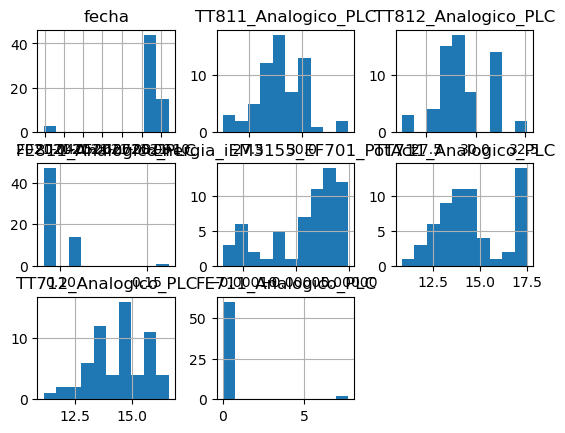

In [19]:
 df[df["Energia_iEM3155_EF701_PotAct"]<=0].hist()

In [53]:
df_clean

,fecha,TT811_Analogico_PLC,TT812_Analogico_PLC,FE811_Analogico_PLC,Energia_iEM3155_EF701_PotAct,TT711_Analogico_PLC,TT712_Analogico_PLC,FE711_Analogico_PLC,ThermCold
0,2021-03-14 08:26:15,28.0201,30.9823,314.272,140.160,14.5797,9.68967,159.563,71.295170
1,2021-03-14 08:31:17,28.0201,31.0836,314.091,147.693,14.8872,9.68967,160.113,77.376669
2,2021-03-14 08:36:19,28.0201,31.1849,314.797,155.344,15.1005,9.79094,165.726,80.177011
3,2021-03-14 08:41:20,28.1250,32.1108,315.014,183.160,15.3284,9.89583,199.609,83.272606
4,2021-03-14 08:46:24,28.4433,33.6118,315.918,247.408,15.5346,9.88137,244.922,87.820667
...,...,...,...,...,...,...,...,...,...
28887,2021-10-29 01:01:14,28.0744,32.0457,241.482,153.796,13.2161,8.56481,160.041,61.471914
28888,2021-10-29 01:06:14,28.1756,32.0457,240.542,153.416,13.1113,8.56481,159.389,59.610394
28889,2021-10-29 01:12:24,28.0744,31.7419,240.614,147.383,13.0100,8.56481,160.185,57.831922
28890,2021-10-29 01:17:25,28.0744,31.6406,240.922,149.099,12.9087,8.56481,159.621,56.073973


# Tractament de les dades
Elimina les mostres en las que l'energia ['Energia_iEM3155_EF701_PotAct'] és menor que 50.

Defineix una nova columna "ThermHeat" i "ThermCold" que representin la potència tèrmica de la part "7" (Cold) i de la part "8" (Heat). La potència tèrmica es defineix com fluxe (FE) x Diferència de temperatura (TT).


In [56]:
# borrar datos cuando esta parado
# como suponemos que esta cerrada
# porque las quitamos? 
# porque 50 KW de threshold
df_clean =df[df["Energia_iEM3155_EF701_PotAct"]>50]

df[df["Energia_iEM3155_EF701_PotAct"]<50]
df
perc_eliminat =( len(df)-len(df_clean))/ len(df)*100
perc_eliminat


38.237230121116376

In [64]:
df_clean["ThermCold"] =df_clean["TT711_Analogico_PLC"] * (
    df_clean["TT711_Analogico_PLC"]- df_clean["TT712_Analogico_PLC"])


In [40]:
cols = ["Energia_iEM3155_EF701_PotAct",
       "ThermCold" ,
       "ThermHeat"]


df_clean["ThermHeat"] =df_clean["FE811_Analogico_PLC"] * (
    df_clean["FE812_Analogico_PLC"]- df_clean["FE811_Analogico_PLC"])
    
sns.pairplot(df_clean[cols])
plt.shot()

KeyError: "['ThermColdThermHeat'] not in index"

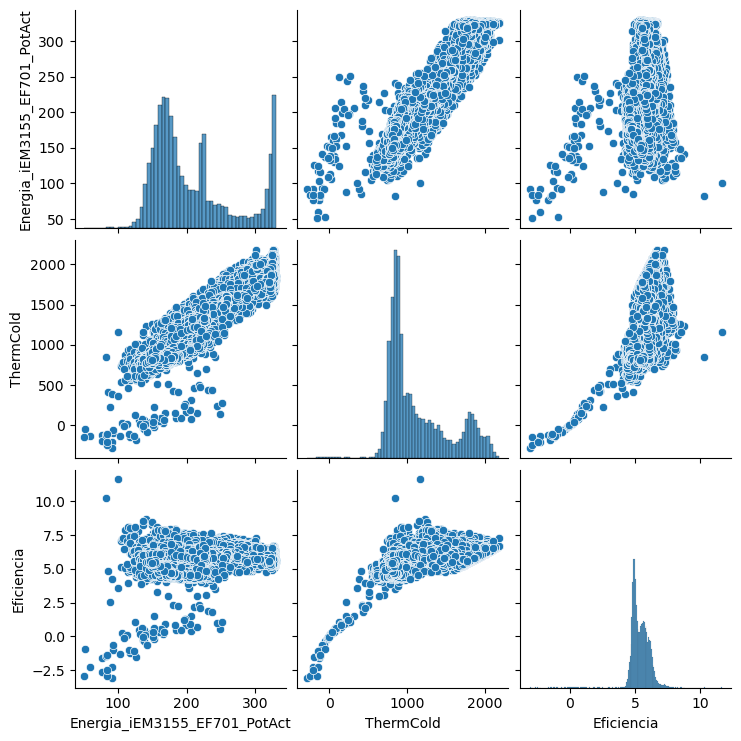

In [66]:
# codigo fixed 
# 2. Estrategia de Outliers: Filtrar datos cuando la máquina está apagada
# Se eliminan registros con potencia o caudal cercanos a 0
df_clean = df[(df['Energia_iEM3155_EF701_PotAct'] > 50) & (df['FE711_Analogico_PLC'] > 50)].copy()

# 3. Calcular ThermCold (Potencia Frigorífica en kW)
# Asumiendo Cp del agua ~4.18 kJ/kgK y factor de conversión para m3/h -> kW es aprox 1.16
factor_conversion = 1.161
df_clean['DeltaT_Evap'] = df_clean['TT711_Analogico_PLC'] - df_clean['TT712_Analogico_PLC']
df_clean['ThermCold'] = df_clean['FE711_Analogico_PLC'] * df_clean['DeltaT_Evap'] * factor_conversion

# 4. Calcular Eficiencia (COP)
df_clean['Eficiencia'] = df_clean['ThermCold'] / df_clean['Energia_iEM3155_EF701_PotAct']

# 5. Visualización: Pairplot solicitado
# Relación entre Energía, ThermCold y Eficiencia
sns.pairplot(df_clean[['Energia_iEM3155_EF701_PotAct', 'ThermCold', 'Eficiencia']])
plt.show()

# Gràfica tipus 'pairplot' amb seaborn

Representa a una gràfica tipus pairplot les diferents columnes del dataframe. En aquest cas entre 'Energia_iEM3155_EF701_PotAct' i les dues columnes noves
# hacer recta de recresion sobre una y ir eliminando los que salgan de el vlaor 



Se eliminaron 550 outliers (IQR)


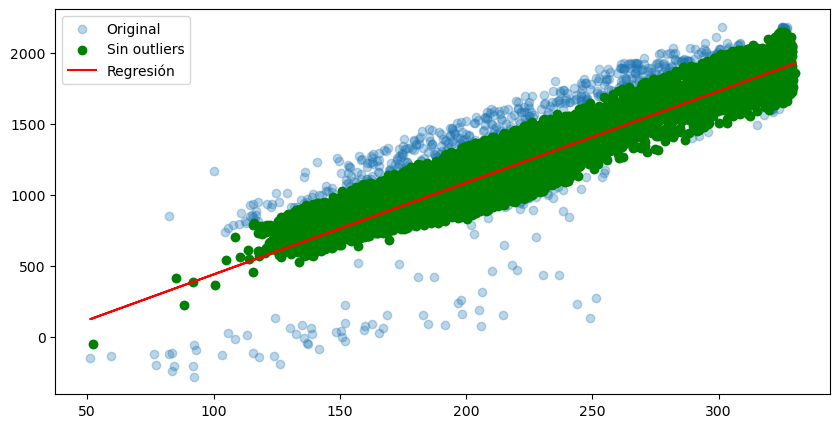

In [74]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 1. Regresión lineal
x = df_clean[['Energia_iEM3155_EF701_PotAct']]
y = df_clean[['ThermCold']]

model = LinearRegression().fit(x, y)
df_clean['residual'] = np.abs(y - model.pre dict(x))

# 2. Cálculo IQR
Q1 = df_clean['residual'].quantile(0.25)
Q3 = df_clean['residual'].quantile(0.75)
IQR = Q3 - Q1

# 3. Definir límites de outlier según Tukey
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 4. Filtrar
df_no_outliers = df_clean[(df_clean['residual'] >= lower) &
                          (df_clean['residual'] <= upper)].copy()

print(f"Se eliminaron {len(df_clean) - len(df_no_outliers)} outliers (IQR)")

# 5. Visualización
plt.figure(figsize=(10,5))
plt.scatter(x, y, alpha=0.3, label="Original")
plt.scatter(df_no_outliers['Energia_iEM3155_EF701_PotAct'],
            df_no_outliers['ThermCold'],
            color='green', label="Sin outliers")
plt.plot(x, model.predict(x), color='red', label='Regresión')
plt.legend()
plt.show()

Proposa una esratègia per eliminar els "outliers"

In [ ]:
#reckplot skater  sepanrando los dos puntos

Defineix una altra columna "Eficiencia" que te per valor ThermCold/Energia_iEM3155_EF701_PotAct.

Ajuda't de les gràfiques que consideris per determinar quin efecte tenen les diferents temperatures (TT) sobre l'eficiència.